In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import editdistance

# Loading the data


In [16]:
with open("Xactium.csv",encoding="UTF-16-le") as f:
    xactium = pd.read_csv(f,error_bad_lines=False)

b'Skipping line 42: expected 56 fields, saw 57\nSkipping line 181: expected 56 fields, saw 57\nSkipping line 186: expected 56 fields, saw 57\nSkipping line 189: expected 56 fields, saw 57\nSkipping line 190: expected 56 fields, saw 57\nSkipping line 191: expected 56 fields, saw 57\nSkipping line 194: expected 56 fields, saw 57\nSkipping line 196: expected 56 fields, saw 57\nSkipping line 202: expected 56 fields, saw 57\nSkipping line 205: expected 56 fields, saw 57\nSkipping line 219: expected 56 fields, saw 57\nSkipping line 222: expected 56 fields, saw 57\nSkipping line 311: expected 56 fields, saw 57\nSkipping line 312: expected 56 fields, saw 57\nSkipping line 313: expected 56 fields, saw 57\nSkipping line 314: expected 56 fields, saw 57\nSkipping line 320: expected 56 fields, saw 57\nSkipping line 635: expected 56 fields, saw 59\nSkipping line 636: expected 56 fields, saw 58\nSkipping line 677: expected 56 fields, saw 57\nSkipping line 1236: expected 56 fields, saw 57\nSkipping li

In [17]:
xactium

,਍AccountId,AssistantName,AssistantPhone,Birthdate,CreatedById,CreatedDate,Department,Description,Email,EmailBouncedDate,...,OtherState,OtherStreet,OwnerId,Phone,PhotoUrl,ReportsToId,Salutation,SystemModstamp,Title,ExtractDate
0,0010Y00000dXQBCQA4,NaN,NaN,1900-01-01,0050Y000002Ua2jQAC,2017-11-13 14:47:08,NaN,NaN,NaN,1900-01-01 00:00:00,...,NaN,NaN,0050Y000002Ua2jQAC,NaN,/services/images/photo/0030Y00000n7giNQAQ,NaN,Mr,2017-11-13 16:33:31,Principal Engineer,2018-06-27 10:58:33.753000000
1,0010Y00000dXQBCQA4,NaN,NaN,1900-01-01,0050Y000002Ua2jQAC,2017-11-13 14:47:05,NaN,NaN,NaN,1900-01-01 00:00:00,...,NaN,NaN,0050Y000002Ua2jQAC,NaN,/services/images/photo/0030Y00000n7gjGQAQ,NaN,Mrs,2017-11-13 16:33:15,Assitant Project Manager,2018-06-27 10:58:33.753000000
2,0010Y00000dXQBCQA4,NaN,NaN,1900-01-01,0050Y000002Ua2jQAC,2017-11-13 14:47:05,NaN,NaN,NaN,1900-01-01 00:00:00,...,NaN,NaN,0050Y000002Ua2jQAC,NaN,/services/images/photo/0030Y00000n7gjPQAQ,NaN,Mr,2018-03-16 16:48:31,Project Manager,2018-06-27 10:58:33.753000000
3,0010Y00000dXQBCQA4,NaN,NaN,1900-01-01,0050Y000002Ua2jQAC,2017-11-13 14:47:05,NaN,NaN,NaN,1900-01-01 00:00:00,...,NaN,NaN,0050Y000002Ua2jQAC,NaN,/services/images/photo/0030Y00000n7gjUQAQ,NaN,Mrs,2017-11-13 16:33:48,Assitant Project Manager,2018-06-27 10:58:33.753000000
4,0010Y00000dXQBCQA4,NaN,NaN,1900-01-01,0050Y000002Ua2jQAC,2017-11-13 14:47:06,NaN,NaN,NaN,1900-01-01 00:00:00,...,NaN,NaN,0050Y000002Ua2jQAC,NaN,/services/images/photo/0030Y00000n7gjZQAQ,NaN,Mr,2017-11-13 16:33:31,Project Support,2018-06-27 10:58:33.753000000
5,0010Y00000dXQBCQA4,NaN,NaN,1900-01-01,0050Y000002Ua2jQAC,2017-11-13 14:47:06,NaN,NaN,NaN,1900-01-01 00:00:00,...,NaN,NaN,0050Y000002Ua2jQAC,NaN,/services/images/photo/0030Y00000n7gjeQAA,NaN,Mr,2017-11-13 16:33:15,Project Support,2018-06-27 10:58:33.753000000
6,0010Y00000dXQBCQA4,NaN,NaN,1900-01-01,0050Y000002Ua2jQAC,2017-11-13 14:47:06,NaN,NaN,NaN,1900-01-01 00:00:00,...,NaN,NaN,0050Y000002Ua2jQAC,NaN,/services/images/photo/0030Y00000n7gjjQAA,NaN,Mr,2018-04-20 20:10:14,Contractor Project Manager / Princpal Designer,2018-06-27 10:58:33.753000000
7,0010Y00000dXQBCQA4,NaN,NaN,1900-01-01,0050Y000002Ua2jQAC,2017-11-13 14:47:06,NaN,NaN,NaN,1900-01-01 00:00:00,...,NaN,NaN,0050Y000002Ua2jQAC,NaN,/services/images/photo/0030Y00000n7gjoQAA,NaN,Mr,2018-03-12 18:35:42,Senior Agent,2018-06-27 10:58:33.753000000
8,0010Y00000dXQBCQA4,NaN,NaN,1900-01-01,0050Y000002Ua2jQAC,2017-11-13 14:47:07,NaN,NaN,NaN,1900-01-01 00:00:00,...,NaN,NaN,0050Y000002Ua2jQAC,NaN,/services/images/photo/0030Y00000n7gjtQAA,NaN,Mr,2017-11-13 16:33:31,Senior Agent,2018-06-27 10:58:33.753000000
9,0010Y00000dXQBCQA4,NaN,NaN,1900-01-01,0050Y000002Ua2jQAC,2017-11-13 14:47:07,NaN,NaN,NaN,1900-01-01 00:00:00,...,NaN,NaN,0050Y000002Ua2jQAC,NaN,/services/images/photo/0030Y00000n7gjyQAA,NaN,Mr,2017-11-13 16:33:15,Design Team Project Manager,2018-06-27 10:58:33.753000000


In [18]:
#Let's drop the columns that only have 1 value
for col in xactium.columns:
    unique_values = xactium[col].unique()
    if len(unique_values) < 2:
        print(col,unique_values)
        xactium = xactium.drop(col,axis=1)

਍AccountId ['0010Y00000dXQBCQA4']
AssistantName [nan]
AssistantPhone [nan]
Birthdate ['1900-01-01']
Department [nan]
Description [nan]
Email [nan]
EmailBouncedDate ['1900-01-01 00:00:00']
EmailBouncedReason [nan]
Fax [nan]
HomePhone [nan]
IsDeleted [False]
Jigsaw [nan]
JigsawContactId [nan]
LastCURequestDate [nan]
LastCUUpdateDate [nan]
LeadSource [nan]
MailingCity [nan]
MailingCountry [nan]
MailingGeocodeAccuracy [nan]
MailingLatitude [nan]
MailingLongitude [nan]
MailingPostalCode [nan]
MailingState [nan]
MasterRecordId [nan]
MobilePhone [nan]
OtherCity [nan]
OtherCountry [nan]
OtherGeocodeAccuracy [nan]
OtherLatitude [nan]
OtherLongitude [nan]
OtherPhone [nan]
OtherPostalCode [nan]
OtherState [nan]
OtherStreet [nan]
ReportsToId [nan]


In [19]:
xactium.Phone.unique()

array([nan, '07830288774', '07583038804', '07525 310 982', '07701 294635',
       '01252 555 700', '07468 482045', '0300 470 2167', '03004703576',
       '0300 470 4615', '07713146387', '0300 470 3226', '0)7841 535335',
       '+44 1223 81 4083', '07867 442180', '0161 235 6176',
       '020 7939 6371', '01912064085', '0113 389 1761', '02086868212',
       '5646546465454', '03004703341', '02034798577', '03004708264',
       '0160 3226708', '300 4702634', '03004702063', '07816 078382',
       '123', '0300 470 4328', '\xa00300 470 3392', '0300 470 4256',
       '\xa00300 470 4406', '0300 470 7316\xa0', '0300 470 4102',
       '0300 470 8327', '0238 062 8607', '0238 062 8710', '02380 628791',
       '02380 628800', '0121 711 6618', '01332947635', '07668 95400',
       '0300 470 3616', '07980691054', '0300 470 8112', '0300 470 3260',
       '0300 470 3055', '0300 470 6227', '07771976921', '02380628635',
       '07818195479', '07713709449', '07825907579', '01925238242',
       '01332 947600'

In [20]:
xactium.sample(10)

,CreatedById,CreatedDate,FirstName,Id,IsEmailBounced,LastActivityDate,LastModifiedById,LastModifiedDate,LastName,LastReferencedDate,LastViewedDate,MailingStreet,Name,OwnerId,Phone,PhotoUrl,Salutation,SystemModstamp,Title,ExtractDate
2638,0050Y000002Uez4QAC,2018-04-20 11:11:35,Iwqs,0030Y00001ILTWQQA5,False,NaN,0050Y000002Uez4QAC,2018-04-20 11:11:35,Afybzhk,NaN,NaN,NaN,Iwqs Afybzhk,0050Y000002Uez4QAC,NaN,/services/images/photo/0030Y00001ILTWQQA5,NaN,2018-04-21 02:40:29,Mr,2018-05-30 14:27:39.917000000
1931,0050Y000002Ua2jQAC,2017-11-21 16:31:35,Uhbl,0030Y00000ouXPFQA2,False,NaN,0050Y000002Ua2jQAC,2017-11-21 16:31:35,Xhbvjpg,NaN,NaN,NaN,Uhbl Xhbvjpg,0050Y000002Ua2jQAC,NaN,/services/images/photo/0030Y00000ouXPFQA2,Mr,2017-11-21 17:57:18,Lean & Collaborative Lead,2018-05-30 14:27:39.327000000
3235,0050Y000002Ua2jQAC,2017-10-05 11:14:15,Imnr,0030Y00000eJzPUQA0,False,NaN,0050Y000002VsMfQAK,2018-03-07 21:36:28,Qfsvkcc,NaN,NaN,NaN,Imnr Qfsvkcc,0050Y000002Ua2jQAC,NaN,/services/images/photo/0030Y00000eJzPUQA0,Mrs,2018-03-08 19:17:45,Section 2 Senior QS,2018-06-27 10:58:33.753000000
2957,0050Y000002Uez4QAC,2018-05-04 17:43:29,Knwb,0030Y00001LqHQmQAN,False,NaN,0050Y000002Uez4QAC,2018-05-04 17:43:29,Ufcbcux,NaN,NaN,NaN,Knwb Ufcbcux,0050Y000002Uez4QAC,NaN,/services/images/photo/0030Y00001LqHQmQAN,Mr.,2018-05-05 05:07:54,Finance Manager,2018-06-27 10:58:34.677000000
133,0050Y000002Ua2jQAC,2017-11-20 11:29:28,Cxwz,0030Y00000otITSQA2,False,NaN,0050Y000002Ua2jQAC,2017-11-20 11:29:28,Fvhabap,NaN,NaN,NaN,Cxwz Fvhabap,0050Y000002Ua2jQAC,NaN,/services/images/photo/0030Y00000otITSQA2,Mr,2017-11-20 19:35:20,Design Assurance/ Design Coordinator,2018-06-27 10:58:33.753000000
2889,0050Y000003Kf8PQAS,2018-04-09 17:33:31,Ibye,0030Y00001H5yN1QAJ,False,NaN,0050Y000003Kf8PQAS,2018-04-09 17:33:31,Dwrlzkw,NaN,NaN,NaN,Ibye Dwrlzkw,0050Y000003Kf8PQAS,0777711111111,/services/images/photo/0030Y00001H5yN1QAJ,Mr.,2018-04-21 02:40:29,Mr,2018-06-27 10:58:34.677000000
478,0050Y000003Ke50QAC,2018-01-18 21:22:10,Rzpe,0030Y00000ypE4OQAU,False,NaN,0050Y000000t51bQAA,2018-02-23 15:21:28,Umgrvsr,NaN,NaN,NaN,Rzpe Umgrvsr,0050Y000002Ua2jQAC,NaN,/services/images/photo/0030Y00000ypE4OQAU,NaN,2018-05-24 21:28:03,NaN,2018-06-27 10:58:33.753000000
4991,0050Y000002Ua2jQAC,2017-10-30 15:07:46,Adlb,0030Y00000l0ET0QAM,False,NaN,0050Y000002Ua2jQAC,2017-10-30 15:07:46,Mgbzrsz,NaN,NaN,NaN,Adlb Mgbzrsz,0050Y000002Ua2jQAC,NaN,/services/images/photo/0030Y00000l0ET0QAM,Mr,2018-01-27 06:48:03,TBC,2018-07-27 10:38:52.313000000
5151,0050Y000002VpXtQAK,2017-11-14 13:40:11,Tnnt,0030Y00000n893YQAQ,False,NaN,0050Y000000t51bQAA,2018-02-23 15:21:27,Xfbcvzs,NaN,NaN,NaN,Tnnt Xfbcvzs,0050Y000002Ua2jQAC,07830288774,/services/images/photo/0030Y00000n893YQAQ,NaN,2018-02-23 15:21:27,NaN,2018-07-27 10:38:52.313000000
5221,0050Y000002Ua2jQAC,2017-11-16 13:20:30,Iebe,0030Y00000n9eCpQAI,False,NaN,0050Y000002Ua2jQAC,2017-11-16 13:20:30,Mgbuiue,NaN,NaN,NaN,Iebe Mgbuiue,0050Y000002Ua2jQAC,NaN,/services/images/photo/0030Y00000n9eCpQAI,Mrs,2017-11-16 17:27:44,DCO Lead,2018-07-27 10:38:52.313000000


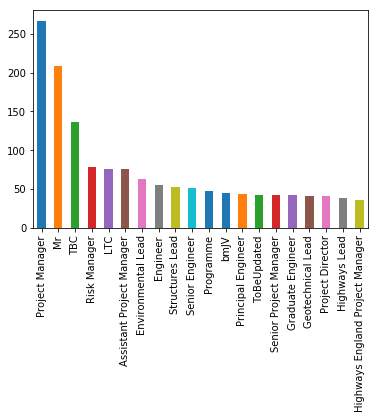

In [75]:
xactium.Title.value_counts()[:20].plot(kind="bar")